In [1]:
import numpy as np
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Problem 2: Logistic Regression and Gradient Descent

In [2]:
# class is used to implement the algorithm of the Logistic Regression 
class Logistic Reg:
    def __init__(self, lr=0.001, n_iter=2000):
        self.lr = lr 
        self.n_iter = n_iter   
        self.w = None
        self.w_set = None
        self.D = None 
        
# sigmoid function to calculate the probability of certain target values         
    def _sigmoid(self, x):
        return 1/(1 + np.exp(-x))

# function set   
    def set(self, y):
        y_u = np.unique(y)
        D = np.zeros((len(y), len(y_u)))
        for k in enumerate(y_u):
            for n in range(len(y)):
                if k[1]==y[n]:
                    D[n,k[0]]=1
                else:
                    D[n,k[0]]=-1
        return D
    
# function to fit train data with corresponding target values to obtain weights 
    def fit(self, X, y):
        # get the number of samples and number of features
        n_samples, n_features = X.shape
        # creates a zero weight consisting number of features+1 elements  
        self.w = np.zeros(n_features+1)
        # insert column of ones to train data
        X = np.insert(X, 0, 1, axis = 1)
        # get unique target values
        y_u = np.unique(y)
        # assign set of weights to zero matrix
        self.w_set = np.zeros((len(y_u), n_features+1))
        # get set of D from funtion set()
        self.D = self.set(y)
        
        # implementation of stochastic gradient descent, by picking random number 
        for i in range(len(y_u)):
            for _ in range(self.n_iter):
                n = random.randint(0,n_samples-1)
                dE = self._sigmoid(-self.D[n,i]*np.dot(self.w, X[n]))*(-self.D[n,i]*X[n])
                self.w = self.w-self.lr*dE
            self.w_set[i,:] = self.w
            
    # function to predict the target value 
    def predict(self, X):
        # assign k to the number of classes
        k = self.w_set.shape[0]
        # insert column of ones to train data
        X = np.insert(X, 0, 1, axis = 1)
        # create a matrix which will save the probabilities of belonging to corresponding class  
        y_predicted = np.zeros((len(X), k)) 
    
        for i in range(k):
            # predict the taget value with each weight in the set of weights 
            linear_model = np.dot(X, self.w_set[i,:])
            # for predicted values the formula of sigmoid function is used  
            y_predicted[:,i] = self._sigmoid(linear_model) 
        # get the argument with the maximum value for the final prediction     
        y_predicted_cls = [np.argmax(i) for i in y_predicted]
        return np.asarray(y_predicted_cls)
    
   
    
    
        
    

In [3]:
# loading the iris data from sklearn
iris = datasets.load_iris()
# dividing feature values and target values
X = iris.data
y = iris.target

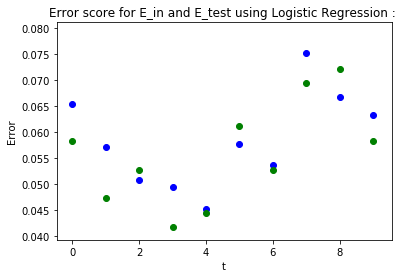

In [16]:
# code for plotting the E_in and E_test as a function of t
for i in range(0, 10):
    # divides to train and test set with size equal to 20% of overall data, also data were stratified to 
    # preserve the proportion of target value in train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
    model = LogisticReg()
    model.fit( X_train, y_train )
    counter_train = 0
    counter_test = 0
    preds_train =  model.predict(X_train)
    preds_test = model.predict(X_test)
    
    # calculates and scatters errors for train dataset E_in
    for j, v in enumerate(preds_train):
        if v != y_train[j]:
            counter_train = counter_train + 1
    plt.scatter( i, counter_train / len(X_train), c='b', label="Train")
    
    # calculates and scatters errors for test dataset E_test
    for j, v in enumerate(preds_test):
        if v != y_test[j]:
            counter_test = counter_test + 1
    plt.scatter( i, counter_test / len(X_test), c='g', label='Test' )

plt.xlabel('t')
plt.ylabel("Error")

plt.title("Error score for E_in and E_test using Logistic Regression : ")
plt.show()

From the plot, it can be seen that errors as a result of using logistic regression for the iris dataset varies
between 0.043 to 0.075. The reason for the variance is because of stochastic gradient descent where the algorithm picks 
a random number to update a weight. Also, the train and test error for each iteration is small and close to each other. It means that the overfitting degree is small.

## Problem 3

#### Implementation of Linear Classifier with OVA

In [7]:
# implementation of Linear Classifier for multi classes 
class LinearClassifier:
    def __init__(self):
        self.X = None 
        self.y = None
        self.y_u = None
        
    # fits the train data
    def fit(self, X, y):
        self.X = np.insert(X, 0, 1, axis = 1)
        self.y = y
        self.y_u = np.unique(y)
    
# one versus all: assigns the target values to 1 if it belongs to chosen class, otherwise, 0. And returns these values as array 
    def OVA(self, e, X, y):
        d = []
    
        for i,l in enumerate(y):
            if l==e:
                d.append(1)
            else:
                d.append(0)

        return d 

# returns weights in accordance with classes 
    def weights(self, X, y):
        weights = np.zeros((1,1))
       
        for e in self.y_u:
            d = np.array(self.OVA(e, X, y))
            X_inv = np.linalg.pinv(X)
            w = np.dot(d.T, X)
            
            if (weights.shape[0] == 1):
                weights = w
            else:
                weights = np.vstack((weights, w))
                
        return weights
     
# predicts target test values. Gets the largest value among predictions of weights since large value indicates the confidence 
# of the model.    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis = 1)
        
        preds_weights = np.dot(X, self.weights(self.X, self.y).T)
        
        champs = [np.argmax(i) for i in preds_weights]
        
        return champs

According to <b>Task 1</b> and <b>Task 2</b>, lectures 12, 13 and 14 were reviewed.

### Task 3

In [8]:
# digits dataset from sklearn was loaded
digits = datasets.load_digits()
X = digits.data
y = digits.target 

# data was splitted to train and test data with size equal to 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### Task 4

In [9]:
# X_train and y_train were fitted by Linear Regression and target values of X_test were predicted 
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [10]:
# function to calculate the error of an algorithm on given test data 
def error(y_test, preds):
    counter = 0
    for i in range(len(y_test)):
        if y_test[i]!=preds[i]:
            counter = counter + 1
    return counter/(len(y_test)) 
        

In [11]:
# function that divides train data to k equal sized folds and uses every fold as a test data to perform cross-validation
# function returns the average error of k errors 
def kfold(model, X, y, k):
    N = len(X)
    width = len(X)//k
    init = 0  
    errors = []
    
    for i in range(k):
        if i==0:
            model.fit(X[width:N], y[width:N])
            preds = model.predict(X[0:width])
            errors = np.append(errors, error(y[0:width],preds))
            continue
    
        model.fit(np.concatenate((X[0:(init+width)], X[(init+2*width):N])), np.concatenate((y[0:(init+width)], y[(init+2*width):N])))
        preds = model.predict( X[ (init+width):(init + 2*width) ] )
        errors = np.append(errors, error(y[(init+width):(init + 2*width)],preds))
        init = init + width
    return np.average(errors)

In [12]:
# function that scatters errors of Linear Regression for given set of folds 
def Lin_Reg_plot( X, y, folds):
    for i in folds:
        # model that was implemented above(in the beginning of problem 3)
        res_lin = kfold( LinearClassifier(), X, y, i )
        plt.scatter(i, res_lin, c='r')

# function that scatters errors of Logistic Regression for given set of folds 
def Log_Reg_plot( X, y, folds ):
    for i in folds:
        # model that was implemented in problem 2
        res_log = kfold( LogisticReg(), X, y, i )
        plt.scatter(i, res_log, c='b')


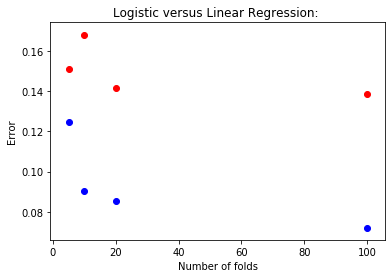

In [13]:
folds = [ 5, 10, 20, 100 ]
Log_Reg_plot(X, y, folds)
Lin_Reg_plot(X, y, folds)
plt.title("Logistic versus Linear Classifier: ")
plt.xlabel("Number of folds")
plt.ylabel("Error")
plt.show()

Logistic Classifier<span style="color:blue"> blue points </span>, 
Linear Classifier<span style="color:red"> red points </span>


The graphic shows that there is a decrease in error when number of cv increases. Also, it can be seen that 
the error of Logistic Classifier in each fold is smaller than Linear Classifier. It means that the logistic model
predicts the target values better.

### Task 5

In [12]:
digits = datasets.load_digits()
X = digits.data
y = digits.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
estimator_lin = LinearRegression()
# checking parameters of Linear regression
estimator_lin.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [14]:
# setting different values for parameters
parameters = { 'normalize': [True,False], 'fit_intercept': [True,False], 'copy_X': [True, False]}
# performing Grid Search to obtain best parameters and best score 
model = GridSearchCV( LinearRegression(), parameters, cv=10)
model.fit(X_train, y_train)
print("Optimal parameters:", model.best_params_)
print("Score for the optimal parameters:", model.best_score_)


Optimal parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Score for the optimal parameters: 0.542565581554791


In [15]:
# Performing Logistic Regression with Grid Search
estimator_log = LogisticRegression()
# Setting values for parameters 'C' and 'penalty'
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], "penalty": ["l1","l2"]}
model2 = GridSearchCV( LogisticRegression(max_iter = 1000), param_grid, cv=10)
model2.fit(X_train, y_train)
print("Optimal parameters: ", model2.best_params_)
print("Score for the optimal parameters: ", model2.best_score_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation

Optimal parameters:  {'C': 0.01, 'penalty': 'l2'}
Score for the optimal parameters:  0.9617181429681431


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


As it can be seen from the result, the Logistic Regression fits the given dataset much more better than Linear Regression. 
However, the running time for Logistic Regression took more time since the model failed to converge. 

## Problem 5: Kaggle Project

In [18]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve,  GridSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


In [19]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [20]:
# loading train and test data from excel file
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [21]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


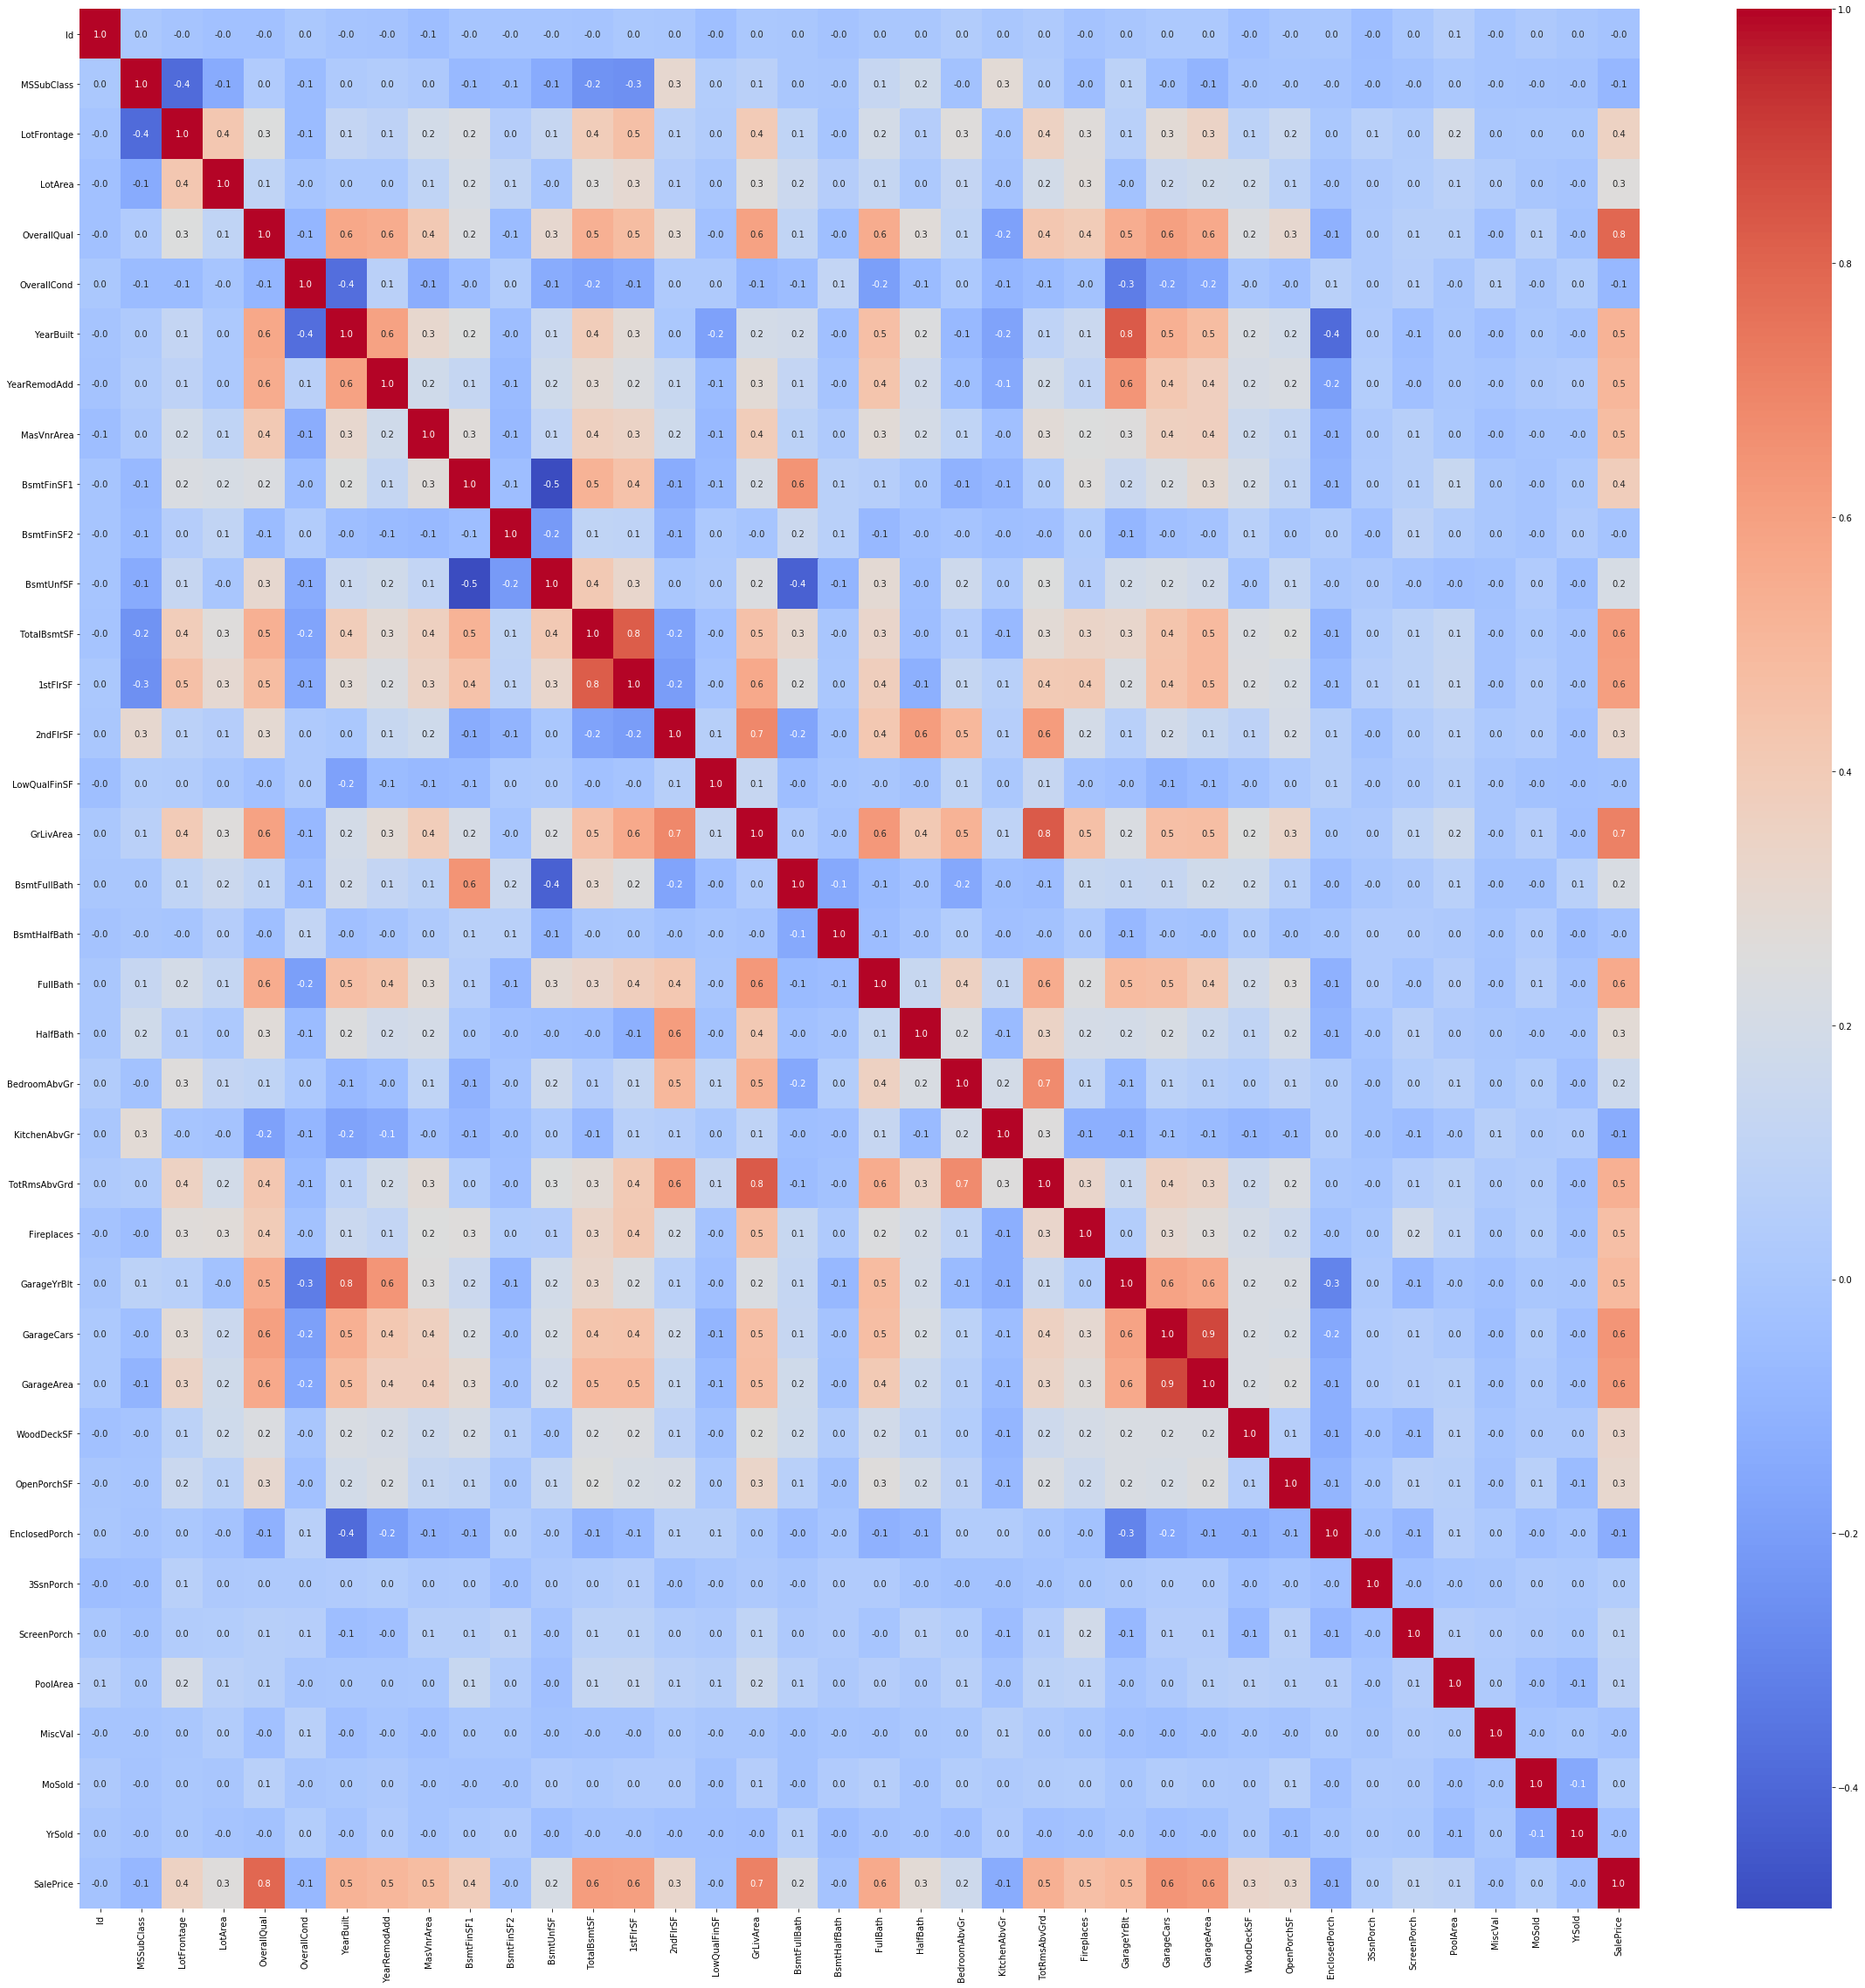

In [22]:
# correlation of features 
plt.rcParams['figure.figsize']=40,40
g = sns.heatmap(train_data.corr(),annot=True, fmt = ".1f", cmap = "coolwarm")

We can see that correlations of features are not significant to drop features

In [23]:
# Since ID of houses do not contribute to the prediction of houses, we can drop this feature 
train_data = train_data.drop('Id', axis=1)
# save the ID of test data in order to submit to Kaggle website
ID_test = test_data['Id']
test_data = test_data.drop('Id', axis=1)

In [24]:
# checking for unique types 
Types =  train_data.dtypes
Types.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [25]:
# check for nulls in features of object types 
ObjTypes = train_data.select_dtypes('O')
ObjTypes.isnull().values.sum()


6617

In [26]:
# replacing nulls with a string 'NA'
ObjTypes = train_data.select_dtypes('O').columns
for o in train_data[ObjTypes]:
    train_data[o].replace(np.nan, 'NA', inplace=True)

ObjTypes2 = test_data.select_dtypes('O').columns
for o in test_data[ObjTypes2]:
    test_data[o].replace(np.nan, 'NA', inplace=True)    


In [27]:
# replacing nulls with 0 for integer types
IntTypes = train_data.select_dtypes('int64')
for i in train_data[IntTypes.columns]:
    train_data[i].replace(np.nan, 0, inplace=True)
    
IntTypes2 = test_data.select_dtypes('int64')
for i in test_data[IntTypes2.columns]:
    test_data[i].replace(np.nan, 0, inplace=True)

# replacing nulls with 0.0 for float types
FloatTypes = train_data.select_dtypes('float64')
FloatTypes2 = test_data.select_dtypes('float64')

for f in train_data[FloatTypes.columns]:
    train_data[f].replace(np.nan, 0.0, inplace=True)
    
for f in test_data[FloatTypes2.columns]:
    test_data[f].replace(np.nan, 0.0, inplace=True)

In [28]:
# checking for nulls in train and test data
print(train_data.isnull().values.sum()+test_data.isnull().values.sum())


0


In [29]:
# separating train data and target value
target = train_data['SalePrice']
train = train_data.drop('SalePrice', axis=1)
test = test_data

In [30]:
# Performing Standard Scaling for numerical columns
# first, we extract numeric columns and perform Standard Scaling
# then, we concatenate scaled numeric columns and object columns 
Num_cols_train = train.select_dtypes('number')
Num_cols_test = test.select_dtypes('number')
scaler = StandardScaler()
Num_cols_train = scaler.fit_transform(Num_cols_train)
Num_cols_test = scaler.fit_transform(Num_cols_test)

train = train.drop(train.select_dtypes('number').columns, axis=1)
train = pd.concat([train, pd.DataFrame(Num_cols_train)], axis=1)

test = test.drop(test.select_dtypes('number').columns, axis=1)
test = pd.concat([test, pd.DataFrame(Num_cols_test)], axis=1)

In [31]:
# converting categorical values to numerical
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape)
print(test.shape)

(1460, 304)
(1459, 292)


In [32]:
# Since the features of train and test data need to be the same, different columns are droped
train_col = train.columns.tolist()
test_col = test.columns.tolist()

difference1 = list((Counter(train_col)-Counter(test_col)).elements()) 
train = train.drop(difference1,axis=1)

difference2 = list((Counter(test_col)-Counter(train_col)).elements())
test = test.drop(difference2,axis=1)

In [33]:
# Now features and their numbers are same 
print(train.columns == test.columns)
print(train.shape)
print(test.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [34]:
# splitting train data itself to train and test
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=1)

In [35]:
# Linear Regression with Grid Search to obtain optimal parameters
LR = LinearRegression()
parameters = { 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False] }

LR_grid = GridSearchCV(LR, parameters, cv = 10)
LR_grid.fit(X_train, y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
preds = LR_grid.predict(X_test)
mean_squared_error(y_test, preds, squared=False)

32605.20296400669

<b>Decision Tree Regressor</b>

In [38]:
#Performing Decision Tree
Tree_params = {
              "max_features": [10, 15, 20, 25],
              "min_samples_leaf": [5, 7, 9, 11]
              }
DTR = DecisionTreeRegressor(random_state=0)
DTR_grid = GridSearchCV(DTR, Tree_params, cv=10)
DTR_grid.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': [10, 15, 20, 25],
                         'min_samples_leaf': [5, 7, 9, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
      

In [39]:
DTR_grid.best_params_

{'max_features': 20, 'min_samples_leaf': 11}

In [40]:
preds = DTR_grid.predict(X_test)
print('RMSE error for Decision Tree Regressor: ', mean_squared_error(y_test, preds, squared=False))

RMSE error for Decision Tree Regressor:  39793.51864832069


<b>Random Forest Regressor</b>

In [43]:
RFR = RandomForestRegressor(random_state=0)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 7, 9 , 11]
# number of trees in the forest 
n_estimators=[50, 100] 
                    
forest_params = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

RFR_grid = GridSearchCV(RFR, forest_params, cv=10)
RFR_grid.fit(X_train, y_train)
preds = RFR_grid.predict(X_test)

In [44]:
RFR_grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [45]:
print('RMSE error for Random Forest Regressor: ', mean_squared_error(y_test, preds, squared=False))

RMSE error for Random Forest Regressor:  25641.998966796258


In [46]:
r2_score(y_test, preds)

0.902057235765064

Three models were tested on the given dataset. The best result was obtained by <b>Random Forest Regressor</b>.

In [48]:
predictions = pd.DataFrame({'Id': ID_test, 'SalePrice': RFR_grid.predict(test)})
print(predictions.head())
predictions.to_csv("submission.csv", index=False)

     Id  SalePrice
0  1461  129090.16
1  1462  154054.00
2  1463  182029.30
3  1464  185052.00
4  1465  202238.00
